# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using LSTM}}$</center>


**Table of Contents**
* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)
* [Analysis](#Analysis)


    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')
LSTM = tf.keras.models.load_model('./Pickles/Models/my_modelLSTM.h5')

In [3]:
from tensorflow.keras.utils import plot_model

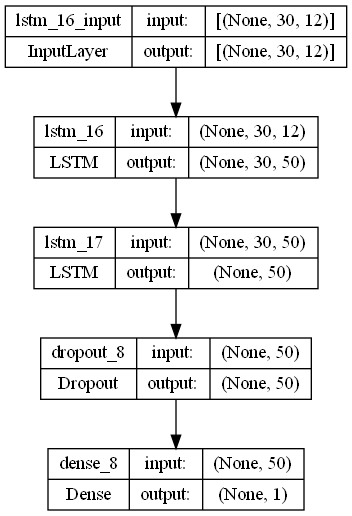

In [4]:
dot_img_file = '/tmp/model_1.png'
plot_model(LSTM, to_file=dot_img_file, show_shapes=True)

<a id="cc"></a>

## ${\textbf{LSTM Forecasting under Climate Change scenarios}}$

In [5]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [6]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
del RCP45['Mean']

In [7]:
RCP45['MonthlyRF'].min()

0.0

In [8]:
del RCP45['Lat']
del RCP45['Lon']
del RCP45['Lat_Pluviometer']
del RCP45['Lon_Pluviometer']

In [9]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])
RCP45['Pz']=0

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP45_scaled = scaler.fit_transform(RCP45)

In [11]:
X,Y=createXY(RCP45_scaled,30)

In [12]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45=RCP45[30:]
RCP45["Pz"]=pred

5382/5382 [==============================] - 16s 3ms/step


In [13]:
RCP45

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,47.949461,4,1.081351,Very wet,6,2009,32.226963
2009-06-01,Fraj,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,47.949461,4,1.081351,Very wet,6,2009,10.028340
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,47.949461,4,1.081351,Very wet,6,2009,14.191011
2009-06-01,El Attar,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,47.949461,4,1.081351,Very wet,6,2009,10.791971
2009-06-01,Majoul,BEN AROUS I MUNICIPA,411.898182,273.444545,114.956364,47.949461,4,1.081351,Very wet,6,2009,13.505039
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,22.313671,1,-0.161186,Moderately dry,12,2100,12.794017
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,22.313671,1,-0.161186,Moderately dry,12,2100,37.418781
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,278.813636,132.886364,89.221818,22.313671,1,-0.161186,Moderately dry,12,2100,35.558044


<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5 }}$

In [14]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
del RCP85['Mean']

In [15]:
del RCP85['Lat']
del RCP85['Lon']
del RCP85['Lat_Pluviometer']
del RCP85['Lon_Pluviometer']

In [16]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])
RCP85['Pz']=0

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
RCP85_scaled = scaler.fit_transform(RCP85)

In [18]:
X,Y=createXY(RCP85_scaled,30)

In [19]:
prediction=LSTM.predict(X)
prediction_copies_array = np.repeat(prediction,12, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85=RCP85[30:]
RCP85["Pz"]=pred

5382/5382 [==============================] - 14s 3ms/step


In [20]:
RCP85

,Piezometer,Pluviometer,YearlyRF,SemestrialRF,TrimestrialRF,MonthlyRF,Zone,SPI,SPI_classes,Month,Year,Pz
date,,,,,,,,,,,,
2009-06-01,Ben Zazia,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,12.058516,4,0.098259,Moderately Wet,6,2009,32.040276
2009-06-01,Fraj,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,12.058516,4,0.098259,Moderately Wet,6,2009,10.332172
2009-06-01,Bir El Kif,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,12.058516,4,0.098259,Moderately Wet,6,2009,13.751888
2009-06-01,El Attar,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,12.058516,4,0.098259,Moderately Wet,6,2009,10.688506
2009-06-01,Majoul,BEN AROUS I MUNICIPA,354.381818,216.021818,81.213636,12.058516,4,0.098259,Moderately Wet,6,2009,13.148512
...,...,...,...,...,...,...,...,...,...,...,...,...
2100-12-01,UCP Ouzra,OUZRA AGRI FLORA,222.970909,100.570909,68.290000,3.932403,1,-0.506723,Moderately dry,12,2100,12.677540
2100-12-01,Salah Khamar,OUZRA AGRI FLORA,222.970909,100.570909,68.290000,3.932403,1,-0.506723,Moderately dry,12,2100,37.521946
2100-12-01,Haj Hadi Jani,OUZRA AGRI FLORA,222.970909,100.570909,68.290000,3.932403,1,-0.506723,Moderately dry,12,2100,35.716095


<a id="Analysis"></a>

${\textbf{Analysis }}$

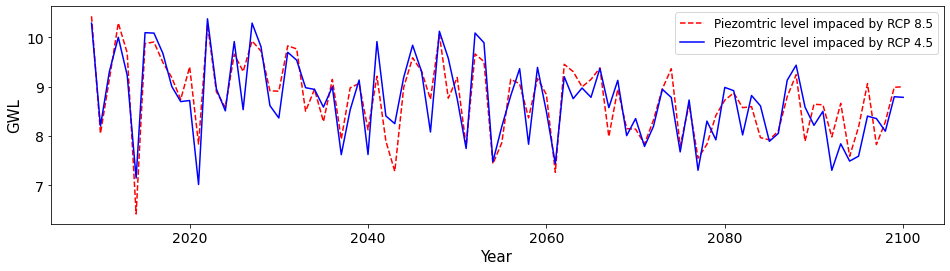

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df=RCP85[(RCP85.Piezometer=='Fraj')& (RCP85.Month==9)]
df1=RCP45[(RCP45.Piezometer=='Fraj')& (RCP45.Month==9)]
mpl.rcParams['figure.figsize'] = (16, 4)
mpl.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '14'
plt.plot(df.groupby(['Year'])['Pz'].mean(),'r--')
plt.plot(df1.groupby(['Year'])['Pz'].mean(),'b')
plt.legend(('Piezomtric level impaced by RCP 8.5','Piezomtric level impaced by RCP 4.5'),fontsize=12, loc = 0)
plt.xlabel('Year',fontsize=15)
plt.ylabel('GWL',fontsize=15)
plt.grid
plt.show()

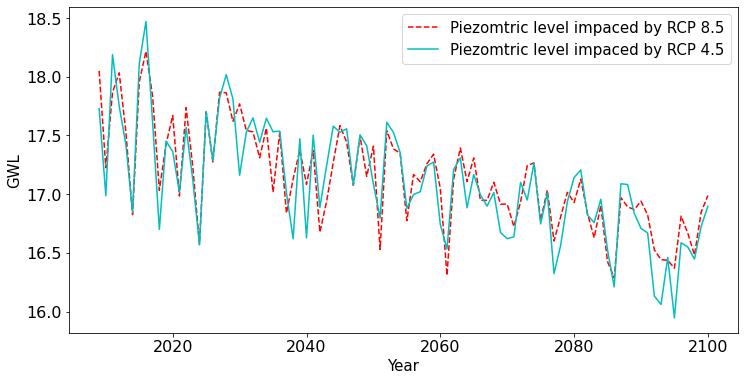

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '16'
plt.plot(df.groupby(['Year'])['Pz'].mean(),'r--')
plt.plot(df1.groupby(['Year'])['Pz'].mean(),'c')
plt.legend(('Piezomtric level impaced by RCP 8.5','Piezomtric level impaced by RCP 4.5'),fontsize=15, loc = 0)
plt.xlabel('Year',fontsize=15)
plt.ylabel('GWL',fontsize=15)
plt.grid=True
plt.show()